In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model


In [6]:
# Load your pre-trained model
model = load_model('/Video_Anomaly_dectection_kaggle/Anomaly_detection/Trained_model/my_model_epoch_1.h5')

# Initialize video capture
video_path = '/Khoa_hoc_dl_xu_ly_anh/Anomaly-Videos/Abuse/Abuse007_x264.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('anomalous_frames.mp4', fourcc, 20.0, (640,480))

frames = []
anomaly_scores = []

In [7]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame to 64x64
    resized_frame = cv2.resize(frame, (64, 64))
    
    # Normalize frame
    normalized_frame = resized_frame / 255.0
    
    # Expand dimensions to match model input
    frame_to_predict = np.expand_dims(normalized_frame, axis=0)
    
    # Predict anomaly score
    anomaly_score = model.predict(frame_to_predict)[0][0]
    
    # Save the frame and its anomaly score
    frames.append(frame)
    anomaly_scores.append(anomaly_score)
    
    # Write frame to output video if anomaly score is high
    # if anomaly_score > 0.0:  # Threshold set to 0.0 to consider all frames
    #     out.write(frame)

# Release everything when job is finished
cap.release()
# out.release()

1/1 [==============================] - 0s 129ms/step


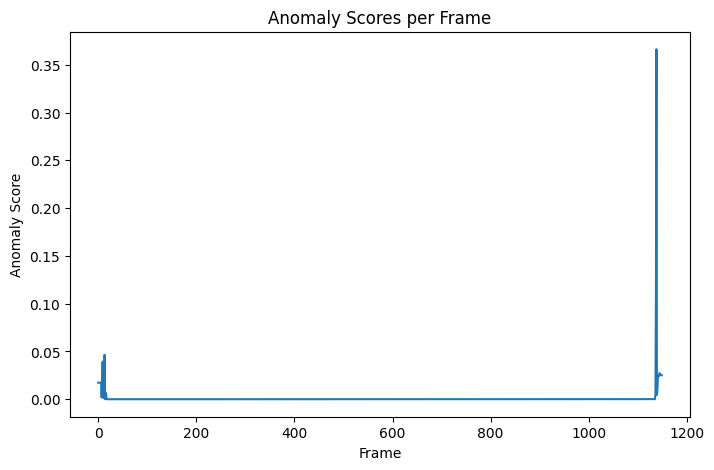

In [8]:
# Plot the anomaly scores
plt.figure(figsize=(8,5))
plt.plot(anomaly_scores)
plt.title('Anomaly Scores per Frame')
plt.xlabel('Frame')
plt.ylabel('Anomaly Score')
plt.show()
